In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
def get_data(folder):
    data = {}
    for filename in os.listdir(folder):
        if filename.endswith(".csv") and ('progress-' in filename):
            df = pd.read_csv(folder + "/" + filename)
            df.columns = df.columns.str.replace(' ', '')
            data[os.path.splitext(filename)[0]] = df
            continue
        else:
            continue
    return data

In [3]:
DATA_DIR = 'lstm-net/recurrent-neural-net/data/mt'

def load_for_cpu(cpu_name):
    dt = get_data(DATA_DIR)
    name1 = 'progress-st-' + cpu_name
    name2 = 'progress-mt-' + cpu_name
    st = dt[name1]
    mt = dt[name2]
    return mt, st

In [7]:
mt, st = load_for_cpu('xeon')

In [8]:
st.head()

,func,type,layers,neurons,iteration,epoc,loss,forward_cpu,forward_time,back_cpu,back_time,adam_cpu,adam_time
0,tanh,Single-threaded,1,16,0,0,4.452622,0.001962,0.002014,0.000566,0.000583,0.000032,0.000032
1,tanh,Single-threaded,1,16,100,0,4.419977,0.068931,0.070741,0.058819,0.060762,0.003176,0.003196
2,tanh,Single-threaded,1,16,200,0,4.313475,0.135717,0.139370,0.116684,0.120657,0.006290,0.006330
3,tanh,Single-threaded,1,16,300,0,3.966292,0.204198,0.209613,0.175348,0.181343,0.009427,0.009480
4,tanh,Single-threaded,1,16,400,0,3.596360,0.271952,0.279157,0.233559,0.241551,0.012580,0.012646


In [9]:
def plot_time(label, mt, st):
    s1000 = st[st['iteration']==1000]
    m1000 = mt[mt['iteration']==1000]
    labels = list(s1000['layers'].astype('string') + 'x' + s1000['neurons'].astype('string'))

    zipped = list(zip(s1000[label], m1000[label]))

    df = pd.DataFrame(zipped, columns=['st', 'mt'])
    
    # norm = [(float(i)-min(a))/(max(a)-min(a)) for i in a]
    #df['nst'] = df['st']-df.min(axis=1)/(df.max(axis=1)-df.min(axis=1))
    #df['nmt'] = df['mt']-df.min(axis=1)/(df.max(axis=1)-df.min(axis=1))
    # d1000 = (df['nst'] - df['nmt'])
    d1000 = (df['st'] - df['mt'])/(df.max(axis=1))
    
    mask1 = d1000 < 0
    mask2 = d1000 >= 0

    plt.figure(figsize=(12, 6))
    plt.title(label)
    plt.xlabel("NET config")
    plt.ylabel("Normalized Performance")
    
    p1 = plt.bar( d1000[mask1].index, d1000[mask1], color = 'r')
    p2 = plt.bar( d1000[mask2].index, d1000[mask2], color = 'g')
    plt.ylim(-1, 1)
    plt.xticks(ticks = np.arange(0, d1000.count(), 1) ,labels = labels, rotation = 'vertical')
    #plt.grid()
    plt.show() 
    # return df

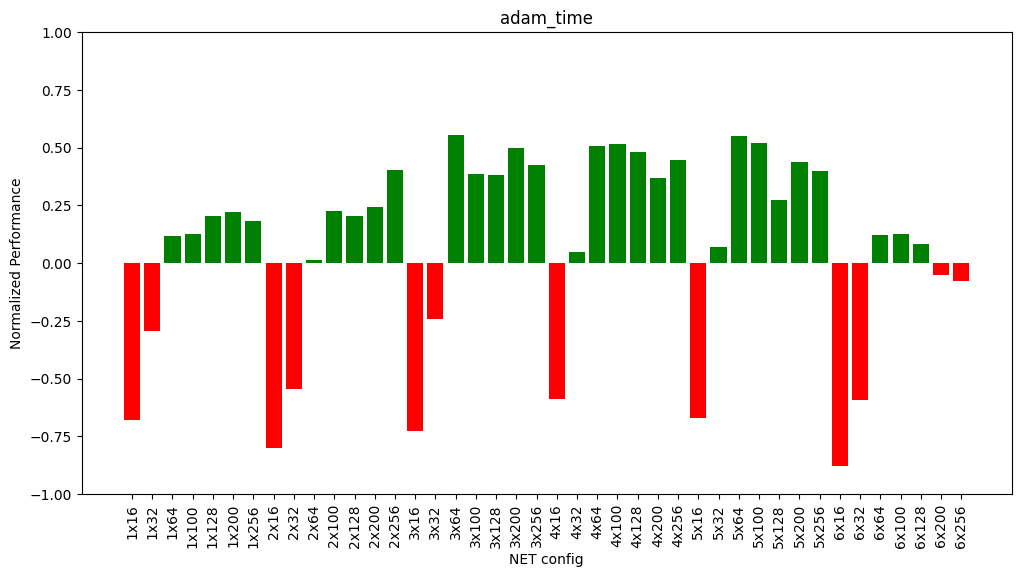

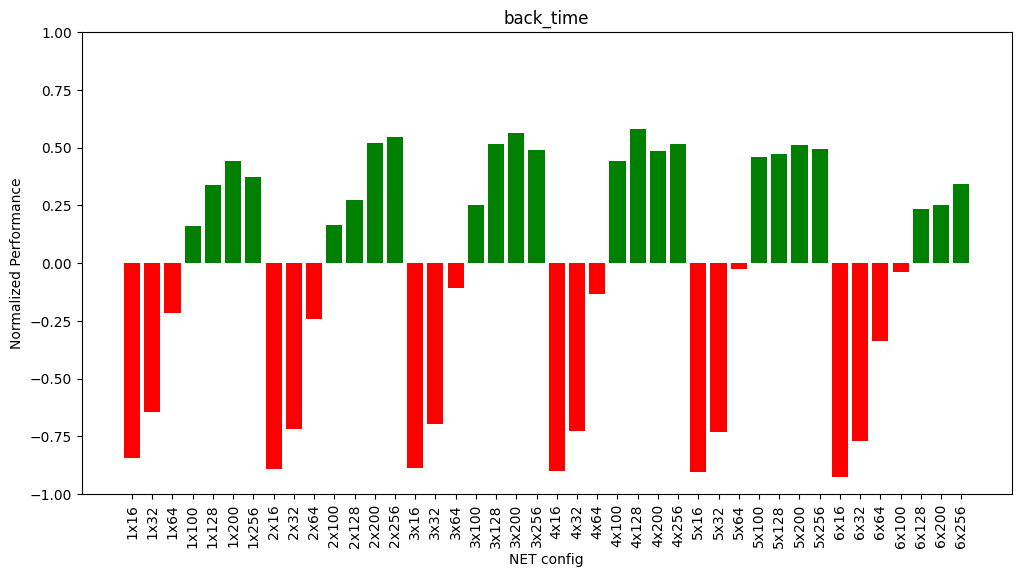

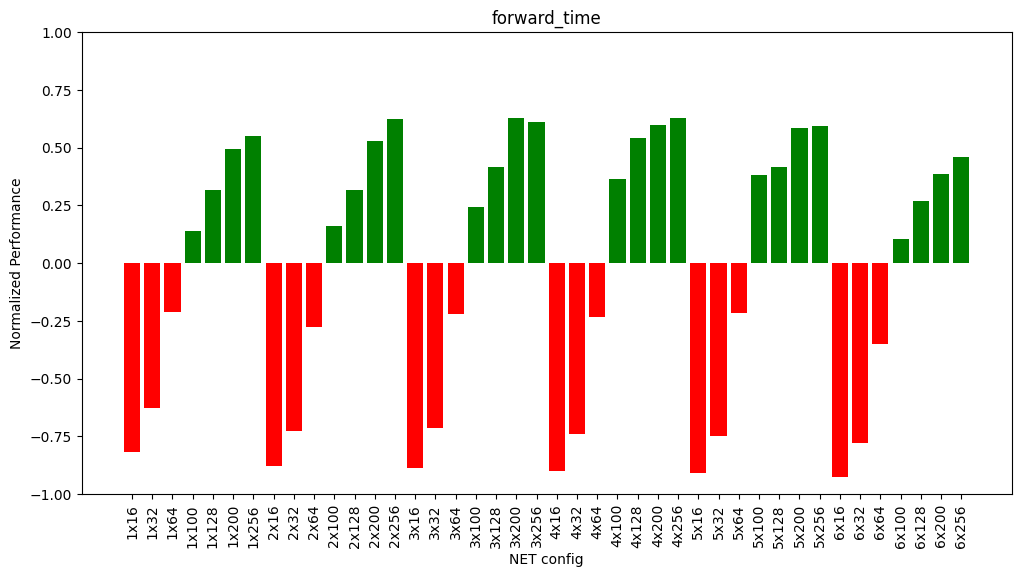

In [10]:
plot_time('adam_time', mt, st)
plot_time('back_time', mt, st)
plot_time('forward_time', mt, st)

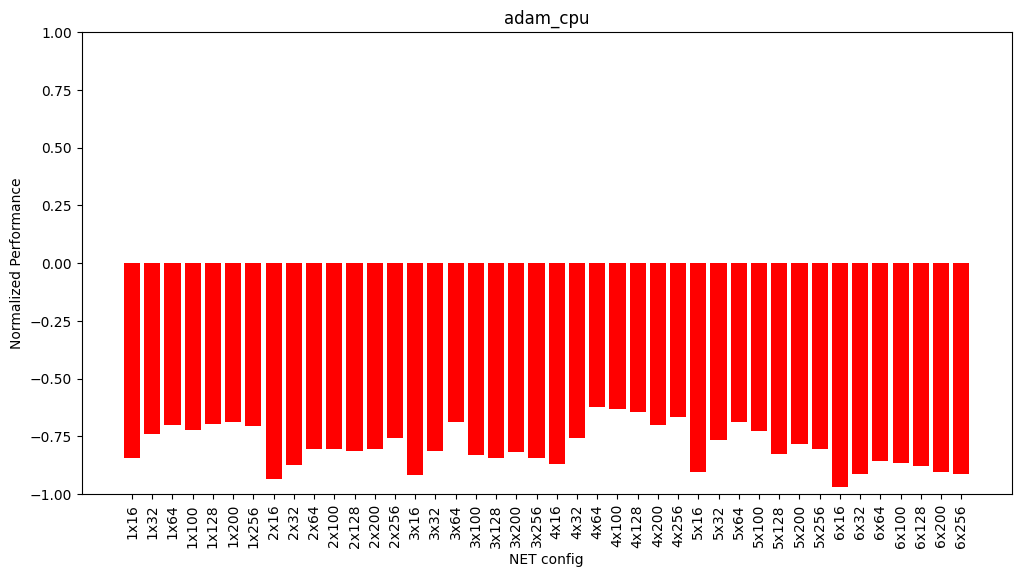

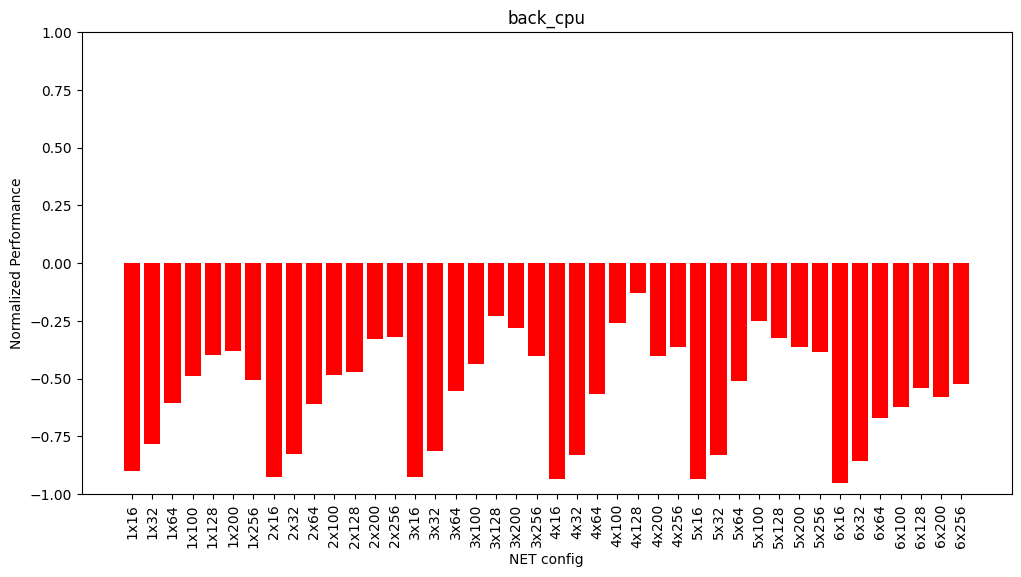

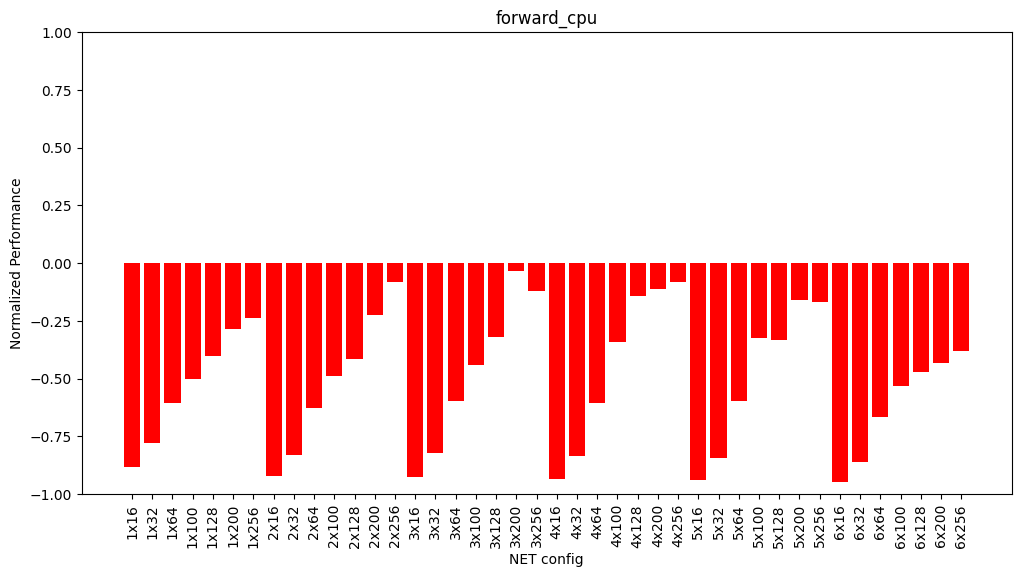

In [11]:
plot_time('adam_cpu', mt, st)
plot_time('back_cpu', mt, st)
plot_time('forward_cpu', mt, st)

In [12]:
def plot_cpu_vs_time(label, mt, st):
    s1000 = st[st['iteration']==1000]
    m1000 = mt[mt['iteration']==1000]
    labels = s1000['layers'].astype('string') + 'x' + s1000['neurons'].astype('string')

    zipped_s = list(zip(s1000[label + '_time'], s1000[label + '_cpu']))
    zipped_m = list(zip(m1000[label + '_time'], m1000[label + '_cpu']))

    df_s = pd.DataFrame(zipped_s, columns=['st', 'mt'])
    df_m = pd.DataFrame(zipped_m, columns=['st', 'mt'])
    
    d_s = (df_s['st'] - df_s['mt'])/df_s.max(axis=1)
    d_m = (df_m['st'] - df_m['mt'])/df_m.max(axis=1)

    fig, ax = plt.subplots(figsize = (12,5))
    
    plt.title('CPU time vs actual time')
    #ax.xticks(rotation='vertical')
    ax.set_xlabel("NET config")
    ax.set_ylabel("Normalized time")
    p1 = ax.bar( labels, d_s, color = 'b', width = -0.5, align = 'edge')
    p2 = ax.bar( labels, d_m, color = 'violet', width=0.5, align = 'edge')
    plt.legend((p1[0], p2[0]), ("Single Thread", "Multiple Threads"))
    ax.set_xticklabels(labels, rotation='vertical')
    ax.set_ylim(-1, 1)
    # ax.grid()
    plt.show() 

/tmp/ipykernel_1403959/1930529079.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation='vertical')


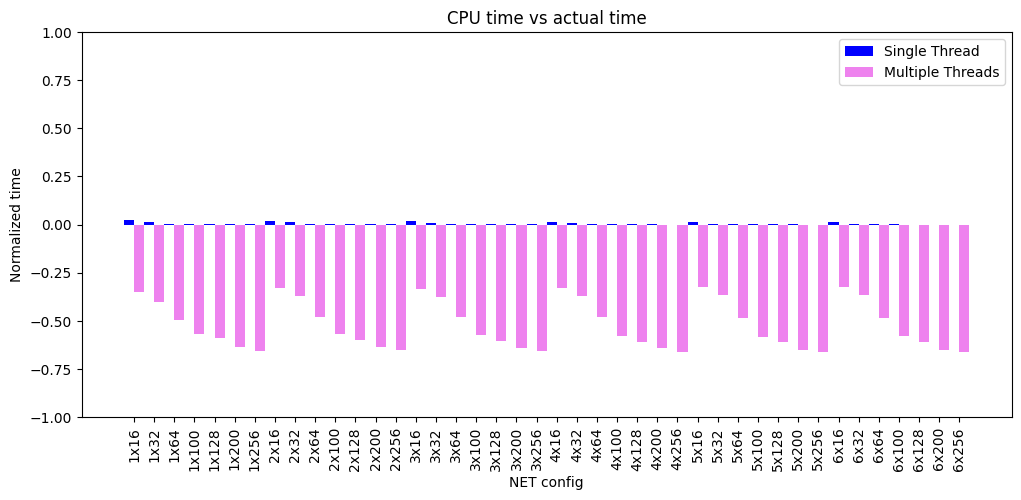

In [13]:
plot_cpu_vs_time('forward', mt, st)